In [68]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

import os

from metrics import compute_segmentation_metrics
from utils.plotting import overlay_masks_on_data, replace_color_in_mask
from utils.datasets.foscal.patient import FOSCALPatient
from utils.preprocessing.numpy import get_idxs_of_annotated_slices, min_max_normalization

challenge_dir = "/home/sangohe/projects/isbi2023-foscal/figs/challenge"

# Utilities

In [15]:
def window_image(image: np.ndarray, window_center: int, window_width: int) -> np.ndarray:
    """Returns a transformed image centered a `window_center`. The resulting
    image range is:
    
    [`window_center` - `window_width` //2, `window_center` + `window_width` //2]"""
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    return window_image

# Images

In [59]:
modalities = ["ADC", "DWI"]
patient_dir = "/data/Datasets/stroke/ISBI_FOSCAL/ACV-021/"
adc_path = os.path.join(patient_dir, "2021-10-24-ADC (10^-6 mm²s)", "SER00008_CEREBRO_+_ANGIO_20211024042640_250.nii.gz")
ncct_path = os.path.join(patient_dir, "2021-10-24-NCCT", "SER00002_CEREBRAL_HELICAL_20211024160801_10.nii.gz")
mask_path = os.path.join(patient_dir, "Masks/Daniel/Case0021ADC.nii")

adc = nib.load(adc_path).get_fdata()
ncct = nib.load(ncct_path).get_fdata()
mask = nib.load(mask_path).get_fdata()

annotated_slices_idxs = get_idxs_of_annotated_slices(mask)
annotated_slices_idxs = np.where(annotated_slices_idxs)[0]
ncct_annotated_slices_idxs = annotated_slices_idxs + 8
adc = adc[..., annotated_slices_idxs]
ncct = ncct[..., ncct_annotated_slices_idxs]
mask = mask[..., annotated_slices_idxs]

In [60]:
annotated_slices_idxs, ncct_annotated_slices_idxs

(array([ 8,  9, 10, 11, 12, 13, 14, 15]),
 array([16, 17, 18, 19, 20, 21, 22, 23]))

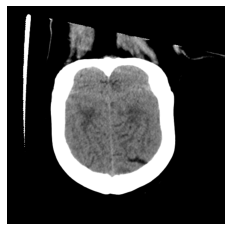

In [74]:
ncols = annotated_slices_idxs.shape[0]
for i in range(ncols):
    adc_save = min_max_normalization(np.rot90(adc[..., i], k=1)).astype(np.float32)
    plt.imshow(adc_save, cmap="gray")
    plt.axis("off")
    plt.savefig(os.path.join(challenge_dir, f'adc_{i}.png'), format='png', transparent=True)

for i in range(ncols):
    ncct_save = min_max_normalization(np.rot90(window_image(ncct[..., i], 40, 80), k=3)).astype(np.float32)
    plt.imshow(ncct_save, cmap="gray")
    plt.axis("off")
    plt.savefig(os.path.join(challenge_dir, f'ncct_{i}.png'), format='png', transparent=True)

# fig, axs = plt.subplots(nrows=3, ncols=ncols, figsize=(ncols*5, 15))
# for i in range(ncols):
    # axs[0, i].imshow(np.rot90(adc[..., i], k=1), cmap="gray")
    # axs[1, i].imshow(np.rot90(window_image(ncct[..., i], 40, 80), k=3), cmap="gray")
    # axs[2, i].imshow(np.rot90(mask[..., i], k=1), cmap="gray")

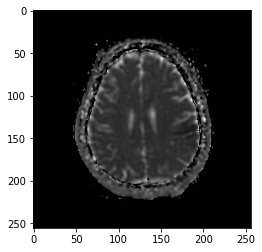

In [72]:
save_img = np.rot90(adc[..., i], k=1)
save_img = min_max_normalization(save_img).astype(np.float32)
plt.imshow(save_img, cmap="gray")
plt.savefig(os.path.join(challenge_dir, 'filename.png'), format='png', transparent=True)
